# Geodatenanalyse 1

## Übung 7: Schließende und bivariate Statistik - Lösung

###  1. Schließende Statistk 

In dieser Übung wollen wir uns die Grundwasserdaten aus der letzten Übung genauer anschauen, und von den gemessenenen Stichproben auf die Gesamtgrundheit der Werte im Hardtwald schließen. 

Lest dazu zunächst wieder den Datensatz (Data_GW_KA.csv) in Python ein, und unterteilt ihn in die Daten aus dem Bereich des Waldes und der Stadt.

In [25]:
# [1]
import pandas as pd

data = pd.read_excel("Data_GW_KA.xlsx")

data_urban = data.loc[data.Flaechennutzung == 1,:]
data_rural = data.loc[data.Flaechennutzung == 2,:]


In der letzten Übung habt Ihr herausgefunden, dass man die Verteilung der gemessenenen Grundwassertemperaturen in der Stadt als normalverteilt annehmen kann. Angenommen Ihr wollt anschließend eine Modellierung durchführen und benötigt 50 zufällig verteilte Werte, die die gleiche statistische Verteilung aufweisen wie die gemessenen Grundwassertemperaturen. 

Dazu müsst Ihr zuerst herausfinden, welche Normalverteilung am besten auf Eure Daten passt. Also welchen Mittelwert und welche Varianz diese theoretische Verteilung hat. Benutzt dafür die Funktion `scipy.stats.norm.fit()`, die zwei Outputs ($\mu$, $\sigma$<sup>2</sup>) hat und als Input den gewünschten Datensatz braucht. 

In [26]:
# [2]
from scipy.stats import norm
mean_f, var_f = norm.fit(data_urban['GW_Temperatur_°C'])
print (mean_f, var_f)

14.258387096774193 1.681848247487104


Mit der Funktion `scipy.stats.norm.rvs()` könnt Ihr nun beliebig viele Zufallswerte generieren. Als Inputs müsst Ihr dafür die zwei statistischen Momente der Normalverteilung angeben, sowie die gewünschte Zahl an Werten (50). 

In [27]:
# [3]
samples = norm.rvs(mean_f, var_f, 50)

Inspiziert nun die erzeugten Werte. Lasst Euch zur Kontrolle auch Mittelwert und Varianz der erzeugten Werte anzeigen, und vergleicht diese mit den Werten der angepassten theoretischen Normalverteilung. Stimmen diese überein?

In [28]:
# [4]
from statistics import mean, variance
mean_samp = mean(samples)
var_samp = variance(samples)
print (mean_samp, var_samp)

14.236756725927856 2.644765324645827


Wahrscheinlich stimmen die Mittelwerte und Varianzen nicht genau überein. Das könnte an der recht geringen Anzahl an generierten Werten (50) liegen. Versucht es daher mal mit 500.000 Werten, und überprüft die statistischen Parameter erneut. Frei nach dem Prinzip "Viel hilft viel". 

Hinweis: mit n=500.000 kann das je nach Laptop etwas dauern. 

In [29]:
# [5]
samples2 = norm.rvs(mean_f, var_f, 500000)
mean_samp2 = mean(samples2)
var_samp2 = variance(samples2)
print (mean_samp2, var_samp2)

14.255807277268843 2.8337711664167924


Mittelwert und Varianz sollten nun näher an den angepassten Werten von oben liegen. Allerdings führt die große Anzahl an Werten (neben längeren Rechenzeiten) bei vielen Verteilungen zu einem anderen Problem. Bestimmt für den eben erzeugten Datensatz den Minimal- und Maximalwert. Was fällt dabei auf?

In [30]:
# [6]
print (min(samples2), max(samples2))

6.136505365217193 21.961139628798733


Basierend auf den gemessenen Daten erscheinen diese Werte viel zu niedrig, bzw. zu hoch. Das liegt daran, dass mit einer hohen Anzahl an Zufallswerten auch Werte in den Extrembereichen mit sehr geringen Wahrscheinlichkeiten generiert werden. 

Das lässt sich vermeiden, indem man mit gestutzten (engl. truncated) Verteilungen arbeitet. Die Funktion `scipy.stats.truncnorm.rvs()` generiert solche Verteilungen. Dafür müssen vor den statistischen Momenten zwei Skalierungsparameter (*a*, *b*) angegeben werden: 

<img src="https://latex.codecogs.com/gif.latex?a&space;=&space;(Minimalwert&space;-&space;mean)/&space;std" title="a = (Minimalwert - mean)/ std" />

und 

<img src="https://latex.codecogs.com/gif.latex?b&space;=&space;(Maximalwert&space;-&space;mean)/&space;std" title="b = (Maximalwert - mean)/ std" />

Überlegt Euch nun sinnvolle Minimal- und Maximalwerte für Eure theoretische Verteilung, berechnet *a* und *b*, und erzeugt damit eine gestutzte Verteilung für die Grundwassertemperaturen. Schaut euch dann die deskriptiven Merkmale der erzeugten Werte an.

Hinweis: Als Funktionn für die Quadratwurzel könnt ihr `math.sqrt()` benutzen. Mit `scipy.stats.describe()` könnt Ihr Euch mit einem Befehl alle wichtigen statistitschen Parameter für eine Variable anzeigen lassen ;)

In [31]:
# [7]
from scipy.stats import truncnorm
from scipy.stats import describe
import math

low = 12
upper = 18
a = (low - mean_f)/math.sqrt(var_f)
b = (upper - mean_f)/math.sqrt(var_f)

print(a, b)

samp_trun = truncnorm.rvs(a, b, mean_f, var_f, size=500000)
describe(samp_trun)

-1.741425823562544 2.8851304281534


DescribeResult(nobs=500000, minmax=(11.329585111466656, 19.109794143433657), mean=14.401402596382443, variance=2.30676069216587, skewness=0.25435299498890324, kurtosis=-0.3949600529113684)

Diese Werte erfüllen unsere Bedinungen nun deutlich besser, und wir könnten sie für weitere Berechnungen nutzen. 

Natürlich gibt es auch Funktionen zum Anpassen an andere theoretische Verteilungen neben der Normalverteilung. Eine Übersicht über die in `scipy` verfügbaren Verteilungen findet Ihr hier: https://docs.scipy.org/doc/scipy/reference/stats.html

Das Ganze wird nochmal anschaulicher, wenn man die beiden Verteilungen graphisch gegenüberstelle. Stellt dafür mit Hilfe von `matplotlib` in einem Plot die Daten als Histogram (`pyplot.hist(data, density =True)`), sowie die Wahrscheinlichkeitsdichtefunktion als Linienplot (`pyplot.plot()`) dar. 

Erzeugt für die Darstellung der Wahrscheinlichkeitsdichtefunktion mit Hilfe von `numpy.linspace()` die benötigten x-Werte, und berechnet die dazugehörigen y-Werte mit Hilfe der Funktion `scipy.stats.norm.pdf(x, mean, variance)`. 

Hinweise: Das Argument `density = True` normiert die y-Werte in Eurem Histogram sodass statt der Häufigkeit die Wahrscheinlichkeit angezeigt wird. Ansonsten hätten Histogramm und Linienplot hier sehr unterschiedliche Y-Achsenwerte. 

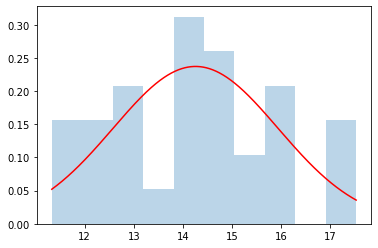

In [32]:
# [8]
import numpy
import matplotlib.pyplot as plt

# generate x-values over range of GWT at which to calculate the probability 
x=numpy.linspace(data_urban['GW_Temperatur_°C'].min(),data_urban['GW_Temperatur_°C'].max(),1000)

# calculate values of fitted probability function at x 
pdf=norm.pdf(x,mean_f,var_f)

plt.plot(x,pdf,'r-') # plot fitted probability distribution
plt.hist(data_urban['GW_Temperatur_°C'], density =True, alpha=.3) # plot original data as histogram 
plt.show()

### 2. Bivariate Statistik

Nach der Betrachtung einzelner Parameter oben, geht es in dieser Übung um die Untersuchung der Beziehung zwischen zwei Parametern. 

Lest dazu zunächst einen gekürzten Datensatz mit den Grundwasserparametern aus Koch et al. (2020) (Data_GW_KA_short.csv) in Python ein. Am einfachsten geht das mit dem `pandas` Package (dazu mehr in den nächsten Wochen). 


In [33]:
# [9]
import pandas as pd
data = pd.read_csv('Data_GW_KA_short.csv', sep=';', encoding='cp1252')

#### Explorative Datenanalyse: Histogramme und Scatterplots

Mit einem neuen Datensatz konfrontiert, ist es sinnvoll sich zuerst visuell einen Überblick über die vorliegenden Parameter, Werte und empirischen Verteilungen zu verschaffen. Für jeden Parameter einzeln geht dies gut über ein Histogramm (siehe oben). 

Um die Histogramme (d.h. die Randverteilungen) zweier Parameter zusammen mit ihrem gemeinsamen Scatterplot darzustellen, gibt es in dem Python-Package `seaborn` die praktische Funktion `seaborn.jointplot()`. `seaborn` ist wie `matplotlib` bereits in Anaconda enthalten, hat einen sehr ähnlichen Syntax und bietet viele spezielle Funktionen zur Visualisierung von statistischen Daten.

Importiert `seaborn` in Euer Notebook und probiert `seaborn.jointplot(x, y)` mit einem beliebigen Parameterpaar `data['name1'], data['name2']` aus dem Datensatz aus. 


c:\Anaconda3\envs\GDA_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


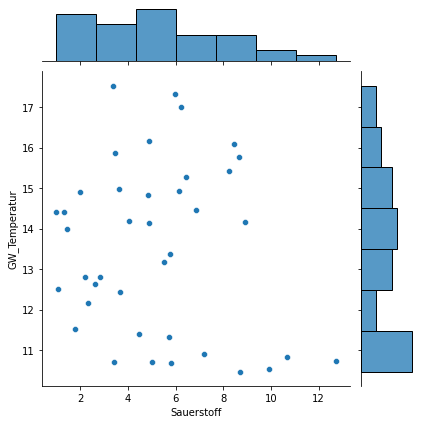

In [34]:
# [10]
import seaborn as sns
sns.jointplot(data['Sauerstoff'], data['GW_Temperatur']) # Option 1 - alte Version bei mir
#sns.jointplot(data = data, x = 'Sauerstoff', y = 'GW_Temperatur') # Option 2 - neue Version bei Euch 

plt.show()

Um einen Überblick über die bivariaten Beziehungen in dem gesamten Datensatz zu bekommen, eignet sich die Funktion `seaborn.pairplot()`, die Histogramme und Scatterplots für einen Datensatz kombiniert. Probiert diese Funktion mal für die Grundwasserdaten aus, und macht Euch ein erstes Bild der Beziehungen zwischen den Parameterpaaren. 

Achtung: Je nach Rechenleistung kann das Ausführen des Codes ein paar Sekunden dauern. 

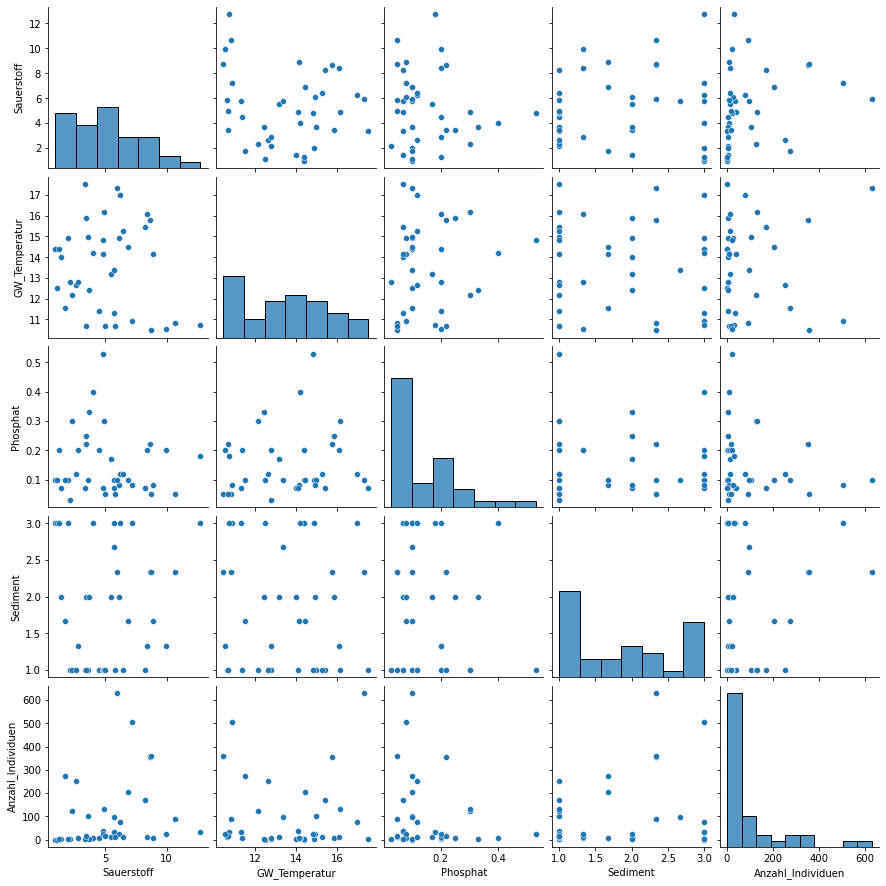

In [35]:
# [11]
import seaborn as sns
sns.pairplot(data)

plt.show()

#### Korrelationskoeffizienten

Nun wollen wir die Beziehungen zwischen den einzelnen Parametern noch genauer qunatifizieren. Das grundlegende Maß dafür ist die Kovarianz. 

<img src="https://latex.codecogs.com/gif.latex?cov_{xy}&space;=&space;\frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" title="cov_{xy} = \frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" />

Um die Kovarianzen für alle Parameterpaare in einem Datensatz zu berechnen, gibt es in `pandas` die Funktion `pandas.DataFrame.cov()`. Nutzt diese um Euch die Kovarianzen aller Parameterpaare der Grundwasserdaten, also die Kovarianzmatrix, anzeigen zu lassen (`print()`). Interpretiert den Wert der Kovarianz im Hinblick auf die Beziehung zwischen den beiden Parametern. Passt der Wert zu der Beobachtung in der Abbildung oben?

In [41]:
# [13]
data = data.drop(columns='Pegel')

cov_matrix = data.cov()
print(cov_matrix)

                   Sauerstoff  GW_Temperatur  Phosphat   Sediment  \
Sauerstoff           8.209471      -0.862375 -0.029748   0.141498   
GW_Temperatur       -0.862375       4.440565  0.029929  -0.013659   
Phosphat            -0.029748       0.029929  0.011623  -0.006913   
Sediment             0.141498      -0.013659 -0.006913   0.648204   
Anzahl_Individuen   97.744211      16.880526 -2.753158  17.569737   

                   Anzahl_Individuen  
Sauerstoff                 97.744211  
GW_Temperatur              16.880526  
Phosphat                   -2.753158  
Sediment                   17.569737  
Anzahl_Individuen       22199.736842  


Die Stärke der Beziehungen zwischen den Parameterpaaren lässt sich aufgrund der sehr unterschiedlichen Varianzen (s. Diagonale der Kovarianzmatrix), allerdings nur schwer vergleichen. Berechnet nun für ein Parameterpaar, z.B. mit einer sehr großen Kovarianz, den Korrelationskoeffizienten nach Pearson, in dem Ihr die entsprechende Kovarianz durch das Produkt der Standardabweichungen teilt. 

Um die Korrelationsmatrix zu berechnen, gibt es in `pandas` den praktischen Befehl `pandas.DataFrame.corr()`. Per default wird dabei der Koeffizient nach Pearson berechnet. Was lässt sich also über die Korrelationen sagen? Vergleicht die Korrelationen mit den Kovarianzen von oben! 

In [37]:
# [14]
corr_matrix = data.corr()
print(corr_matrix)

                   Sauerstoff  GW_Temperatur  Phosphat  Sediment  \
Sauerstoff           1.000000      -0.142830 -0.096302  0.061339   
GW_Temperatur       -0.142830       1.000000  0.131738 -0.008051   
Phosphat            -0.096302       0.131738  1.000000 -0.079638   
Sediment             0.061339      -0.008051 -0.079638  1.000000   
Anzahl_Individuen    0.228960       0.053764 -0.171394  0.146466   

                   Anzahl_Individuen  
Sauerstoff                  0.228960  
GW_Temperatur               0.053764  
Phosphat                   -0.171394  
Sediment                    0.146466  
Anzahl_Individuen           1.000000  


Generell sind die Korrelationen in dem Datensatz sehr niedrig, was daran liegen könnte, dass es zwischen den Parametern keine lineare Beziehungen, sondern komplexere Assoziationen gibt. Berechnet nun den  über die Funktion `scipy.stats.spearmanr()`. Wie verhalten sich die Werte im Vergleich zu oben?

In [42]:
# [15]
import scipy as sp

r = sp.stats.spearmanr(data['Sauerstoff'],data['GW_Temperatur'])
print (r)

SpearmanrResult(correlation=-0.06316748567026838, pvalue=0.7024405123948583)


Wie in der Vorlesung erwähnt gibt es noch einen dritten häufig verwendeten Korrelationskoeffizienten, der besonders für diskrete Daten geeignet ist. Wählt aus dem Datensatz einen diskreten Parameter aus, und bestimmt mit Hilfe von `scipy.stats.kendalltau()` die Korrelation zu einem weiteren beliebigen Parameter. Überprüft danach ob und wie sich die drei Korrelationskoeffizienten (`scipy.stats.pearsonr()`) für dieses Parameterpaar unterscheiden. 

In [44]:
# [17]
r_pear = sp.stats.pearsonr(data['Sediment'],data['Anzahl_Individuen'])
r_spear = sp.stats.spearmanr(data['Sediment'],data['Anzahl_Individuen'])
r_tau = sp.stats.kendalltau(data['Sediment'],data['Anzahl_Individuen'])

print (r_pear, r_spear, r_tau )

(0.14646557616592312, 0.3736111785965318) SpearmanrResult(correlation=-0.07098288249384602, pvalue=0.667626508259695) KendalltauResult(correlation=-0.05154355799732965, pvalue=0.6701212825532348)


Zur Visualisierung von Werten in Matrizen bieten sich sog. heatmaps an. Ganz einfach geht dies mit der Funktion `seaborn.heatmap()`. Mit dem zusätzlichen Argument `annot=True` könnt Ihr Euch auch die Zahlenwerte in den Kästchen für eine der Matrizen oben anzeigen lassen. 

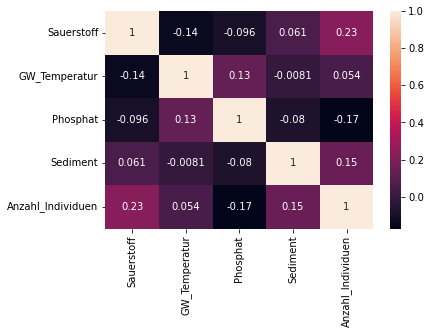

In [45]:
# [18]
sns.heatmap(corr_matrix, annot=True)
plt.show()

Wenn Ihr noch Zeit habt, gibt es eine schöne Galerie mit Beispielen zu Datenvisualisierung mit seaborn (https://seaborn.pydata.org/examples/index.html), die es sich anzuschauen lohnt. 


### Ende

#### Referenzen: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf
